In [1]:

! [ -e /content ] && pip install -Uqq fastbook

# Grupo 03 - Reconhecimento de objetos usando SSD

## Conceitos básicos

- **Single Shot Multibox Detector:** É uma abordagem de detecção de objetos em imagens em tempo de predição com uma única CNN profunda, mantendo precisão e melhor performance que outras abordagens. [Link para o paper](https://arxiv.org/pdf/1512.02325v5.pdf)
- **COCO:** O *Common Objects in Context* é o dataset de detecção e segmentação de objetos que usaremos, com 80 categorias de objetos, 330k imagens entre outros. Além de ter sido utilizada no paper, decidimos mantê-la por conta de sua contextualização dos objetos, o que ajuda para o treinamento e utilização da rede.

## Passo 1 - Data-loading

In [2]:
from fastbook import *
from fastai.vision.all import *

from pprint import pp # for printing formatted data

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:

# loads small set of the COCO dataset, full set would be 'COCO_SAMPLE' which has a 3.24GB size
coco = untar_data(URLs.COCO_TINY)
images, labeled_boundingbox = get_annotations(coco/'train.json')

# creates a dict with img name as key and a tuple listing bounding box coords and their respective labels
# and uses the created dict as the labeling function for the model
img2bbox = dict(zip(images, labeled_boundingbox))
get_y_func = lambda o:img2bbox[o.name]

# exemplifies img2box contents
pp((next(iter(img2bbox)), img2bbox[next(iter(img2bbox))]))

('000000542959.jpg',
 ([[32.52, 86.34, 41.050000000000004, 95.75],
   [98.12, 110.52, 100.07000000000001, 114.59],
   [91.28, 51.62, 95.23, 57.339999999999996],
   [110.48, 110.82, 125.03, 126.03999999999999],
   [96.63, 50.18, 115.3, 63.64],
   [0.69, 111.73, 12.49, 124.79]],
  ['chair', 'vase', 'vase', 'chair', 'chair', 'chair']))


In [4]:
# example of some labels
c = set()
for i in labeled_boundingbox:
  c = c.union(set(i[1]))
c

{'book', 'chair', 'couch', 'remote', 'tv', 'vase'}

In [5]:
# configures coco as the base path
Path.BASE_PATH = coco

In [6]:
# example of a boundingbox coordinates and label in a image
coords, labels = labeled_boundingbox[0]
list(zip(labels, coords))

[('chair', [32.52, 86.34, 41.050000000000004, 95.75]),
 ('vase', [98.12, 110.52, 100.07000000000001, 114.59]),
 ('vase', [91.28, 51.62, 95.23, 57.339999999999996]),
 ('chair', [110.48, 110.82, 125.03, 126.03999999999999]),
 ('chair', [96.63, 50.18, 115.3, 63.64]),
 ('chair', [0.69, 111.73, 12.49, 124.79])]

In [7]:
# creates getters functions for datablock
getters = [
  lambda img: coco/'train'/img,
  lambda boundingbox: img2bbox[boundingbox][0],
  lambda bb_label: img2bbox[bb_label][1]
]

In [8]:
def get_train_imgs(noop):  return images

In [9]:
# creates datablock object and dataloaders
datablock_obj = DataBlock(
  blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
  splitter=RandomSplitter(),
  get_items=get_train_imgs,
  getters=getters,
  n_inp=1
)

dataloaders = datablock_obj.dataloaders(coco/'train')


In [10]:
# number of classes inside the dataloaders
dataloaders.c = 12

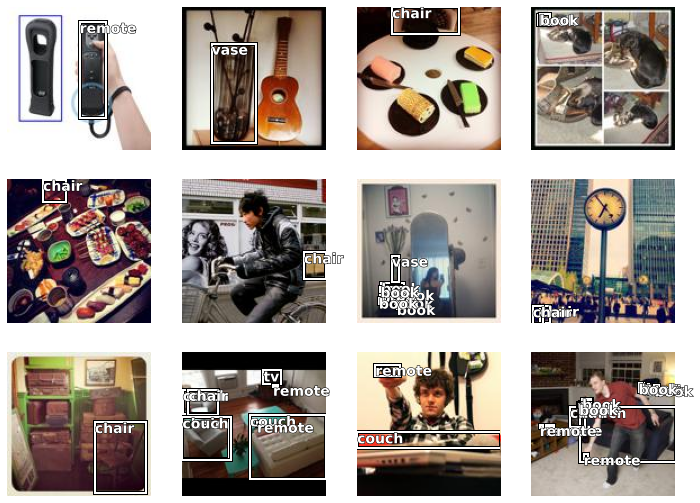

In [11]:
# dataloaders.show_batch()
dataloaders.train.show_batch(max_n=12)

In [12]:
# show list with paths of dataset
coco.ls()

(#2) [Path('train'),Path('train.json')]